# Numerical Variable Analysis

In [1]:
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Cleansing the data/result clean data.xlsx")

In [3]:
df = df[df["Metric:"]=="PxVar"]

In [4]:
df.dtypes.value_counts()

float64           26
object            18
int64              5
datetime64[ns]     1
dtype: int64

In [5]:
non_category_columns = [x for x in df.columns if df[x].dtypes != 'O']
non_category_columns.remove('Au date')

date_column = [x for x in df.columns if df[x].dtypes == "datetime64[ns]"] 

columns_to_remove = [x for x in non_category_columns if df[x].value_counts().count() < 8]
columns_to_remove.remove('15_Daily_Output')
columns_to_remove.remove('15__TPR_20,10')
columns_to_remove.append('Audit_ID')
columns_to_remove.append('Case:')

numerical_columns = [x for x in non_category_columns if x not in columns_to_remove]
numerical_columns

['6_k_user',
 '10_k_user',
 '15_k_user',
 '18_k_user',
 '6FFF_k_user',
 '10FFF_k_user',
 '6_Daily_Output',
 '10_Daily_Output',
 '15_Daily_Output',
 '18_Daily_Output',
 '6FFF_Daily_Output',
 '10FFF_Daily_Output',
 '6__TPR_20,10',
 '10__TPR_20,10',
 '15__TPR_20,10',
 '18__TPR_20,10',
 '6FFF__TPR_20,10',
 '10FFF__TPR_20,10',
 'predictedValue']

## Missing values in each column

In [6]:
missing_count = df[numerical_columns].isna().sum()
missing_count = missing_count.sort_values(ascending = False)

missing_percent = (df[numerical_columns].isna().sum() / df[numerical_columns].shape[0]) * 100
missing_percent = missing_percent.sort_values(ascending = False)

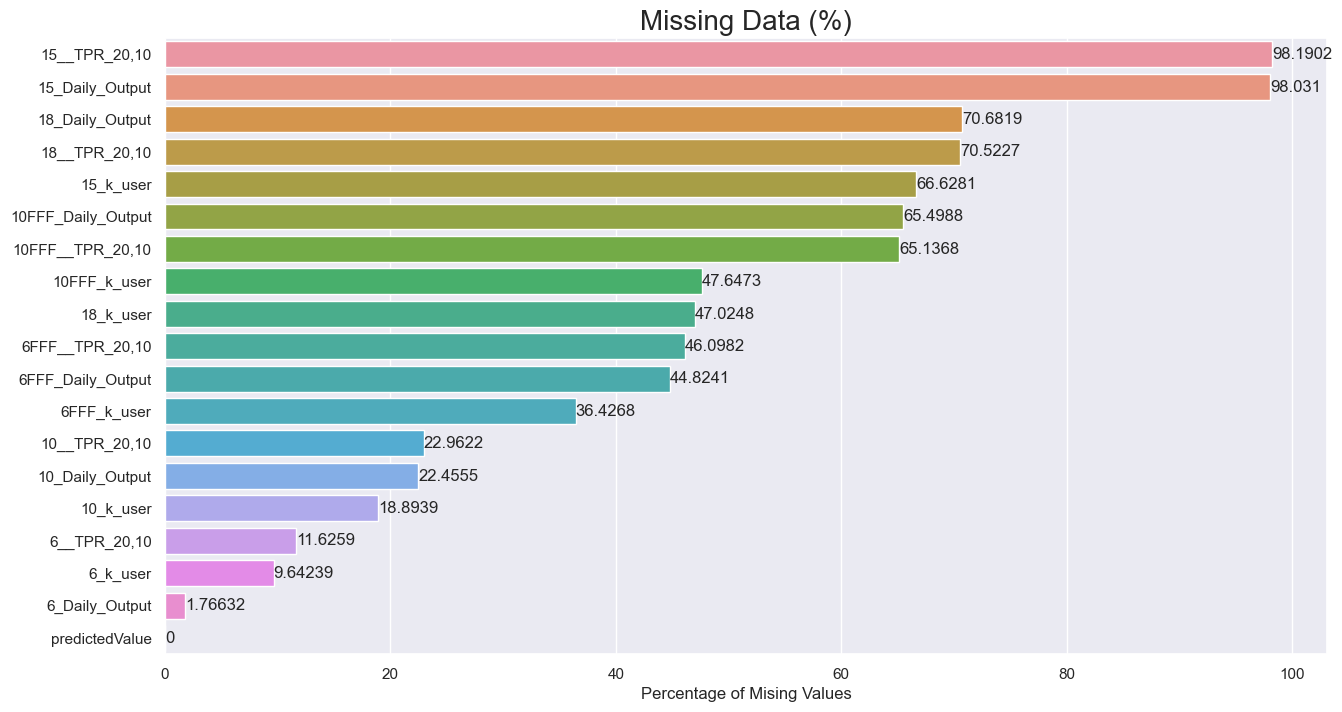

In [7]:
sns.set(rc={'figure.figsize':(15,8)})

ax = sns.barplot(y = missing_percent.index, x = missing_percent.values, orient='h')
ax.set(xlabel="Percentage of Mising Values", yticklabels=missing_percent.index)
ax.set_title("Missing Data (%)", size = 20)
sns.set_theme(style = "white")
for i in ax.containers:
    ax.bar_label(i,)

plt.savefig("Figures/Missing Data.png")
plt.show()

In [8]:
numerical_columns

['6_k_user',
 '10_k_user',
 '15_k_user',
 '18_k_user',
 '6FFF_k_user',
 '10FFF_k_user',
 '6_Daily_Output',
 '10_Daily_Output',
 '15_Daily_Output',
 '18_Daily_Output',
 '6FFF_Daily_Output',
 '10FFF_Daily_Output',
 '6__TPR_20,10',
 '10__TPR_20,10',
 '15__TPR_20,10',
 '18__TPR_20,10',
 '6FFF__TPR_20,10',
 '10FFF__TPR_20,10',
 'predictedValue']

In [9]:
# Columns with more than 35% missing values
numerical_columns =  [name for name, value in zip(missing_percent.index, missing_percent.values) if value <= 35]

In [10]:
print(f"Total number of features to be included in the numerical analysis: {len(numerical_columns)}\n")
for col in df[numerical_columns].columns:
    print(col)

Total number of features to be included in the numerical analysis: 7

10__TPR_20,10
10_Daily_Output
10_k_user
6__TPR_20,10
6_k_user
6_Daily_Output
predictedValue


## Distributions of each feature

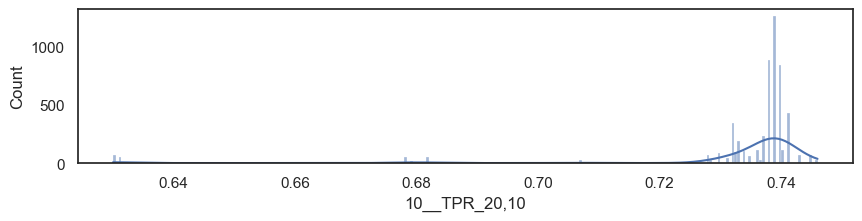

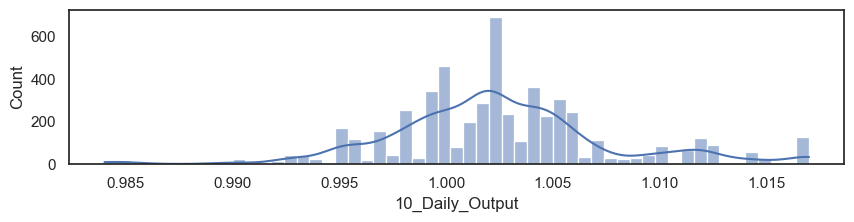

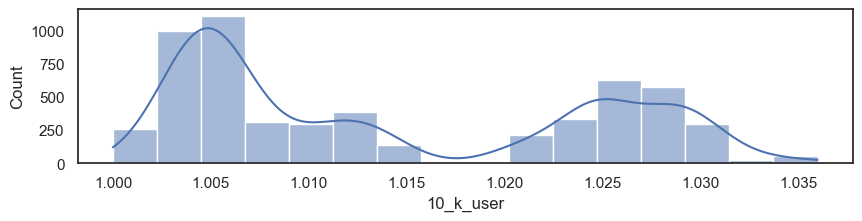

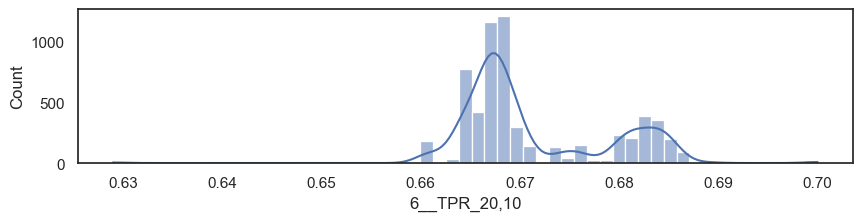

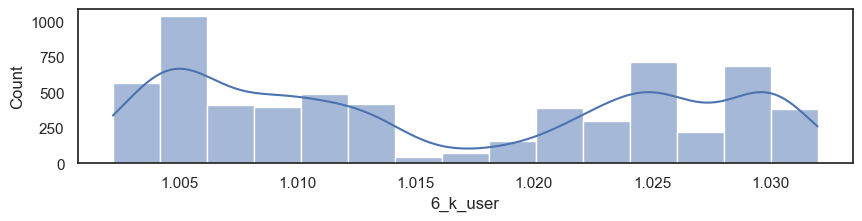

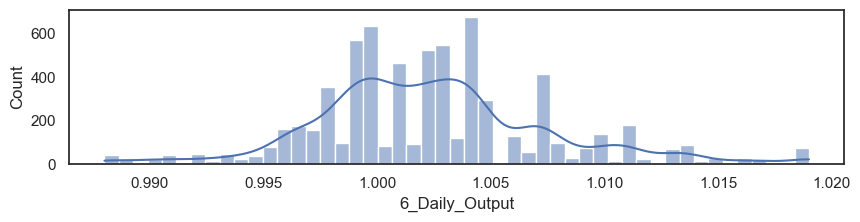

In [12]:
num_filled_cells = len(numerical_columns)-1 #7
for i in range(num_filled_cells):
    sns.set(rc={'figure.figsize':(10,2)})
    sns.set_style("white")
    sns.histplot(df[numerical_columns[i]], color = "C0", kde = True)
    file_name = "Histogram--" + str(numerical_columns[i])
    plt.savefig("Figures/Histograms/"+file_name)
    plt.show()

In [ ]:
# # rows = 7
# # cols = 3

# rows = 3
# cols = 3
# num_filled_cells = len(numerical_columns)-1 #7

# fig, ax = plt.subplots(ncols = cols, nrows=rows, squeeze= False, figsize = (30,16))
# fig.tight_layout(pad=2)
# for i in range(num_filled_cells):
#     row = i//cols
#     col = i%cols
#     sns.histplot(df[numerical_columns[i]], ax = ax[row, col], color = "C0")
    
# fig.suptitle("Distributions of Numerical Features")
    
# ax[2,2].set_axis_off()
# ax[2,1].set_axis_off()

# plt.savefig("Figures/Distributions of Numerical Features.png")
# plt.show()

## Ranges and Potential Outliers

In [13]:
cols = sns.color_palette("Spectral",8)
cols

[(0.8472126105344099, 0.2612072279892349, 0.30519031141868513),
 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.9977700884275279, 0.930872741253364, 0.6330642060745867),
 (0.944252210688197, 0.9777008842752788, 0.6620530565167244),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569),
 (0.4530565167243369, 0.7815455594002307, 0.6462898885044214),
 (0.21607074202229912, 0.5556324490580546, 0.7319492502883507)]

0
Boxplot--10__TPR_20,10


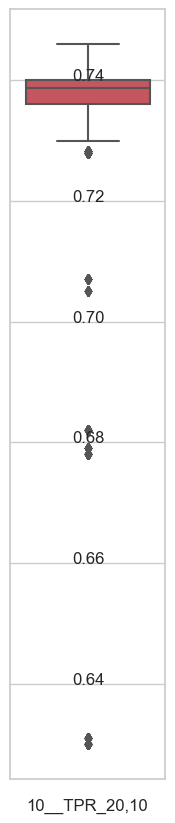

1
Boxplot--10_Daily_Output


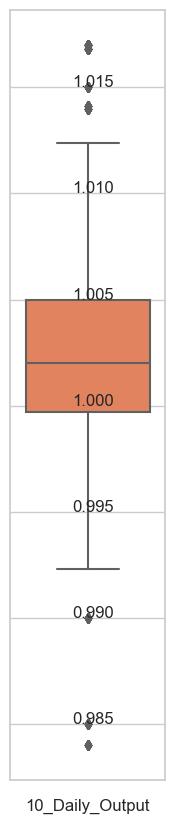

2
Boxplot--10_k_user


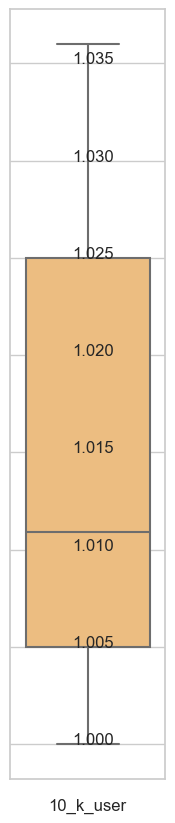

3
Boxplot--6__TPR_20,10


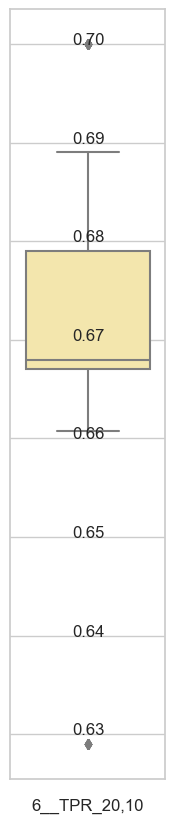

4
Boxplot--6_k_user


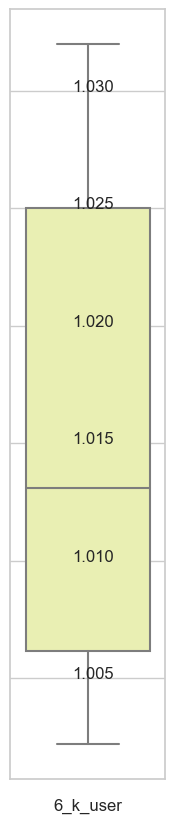

5
Boxplot--6_Daily_Output


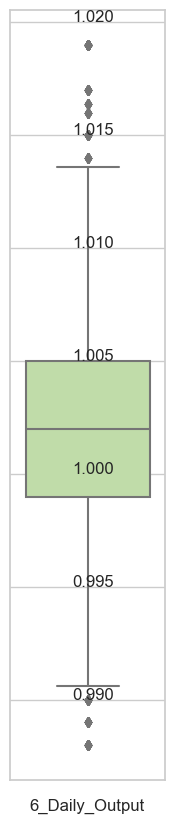

In [14]:
sns.set(rc={'figure.figsize':(2,10)})
sns.set_style("whitegrid")

for i in range(len(numerical_columns[:-1])):
    print(i)

    p = sns.boxplot(df[numerical_columns[i]], color=cols[i],orient='v')
    
    ylab_text = p.get_yticklabels()
                 
    ylab_min = ylab_text[0].get_text()
    ylab_min_pos = ylab_text[0].get_position()[1]
    ylab_max = ylab_text[-1].get_text()
    ylab_max_pos = ylab_text[-1].get_position()[1]
    
    ylab_range = float(ylab_max) - float(ylab_min)
    
    texts = [x.get_text() for x in ylab_text][1:-1]
    positions = [x.get_position()[1] for x in ylab_text][1:-1]
    
    p.set(xlabel=numerical_columns[i])
    p.set(xticklabels="")
    p.set(yticklabels="")
    for j in range(len(positions)):
        p.text(-0.1,positions[j], texts[j])
    
    # p.text(-0.1,ylab_min_pos + 0.029*(ylab_range), ylab_min)
    # p.text(-0.1, ylab_max_pos - 0.035 * (ylab_range) ,ylab_max)
    
    file_name = "Boxplot--" + str(numerical_columns[i])
    print(file_name)
    plt.savefig("Figures/Boxplots/" + file_name)
    plt.show()

In [15]:
# fig, ax = plt.subplots(nrows=2, ncols=4, squeeze= True, figsize = (10,10))
# fig.suptitle("Boxplots of Features", fontsize = 16)
# fig.tight_layout(w_pad=2, h_pad=1)

# for i in range(len(numerical_columns[:-1])):
#     row = i//4
#     column = i%4
#     p = sns.boxplot(df[numerical_columns[i]], ax = ax[row,column], color=cols[i])
#     p.set(xlabel=numerical_columns[i])
#     p.set(xticklabels="")
    
# ax[1,3].set_axis_off()
# # ax[2,1].set_axis_off()

# plt.savefig("Figures/Boxplots/All Boxplots of Features.png")
# plt.show()

## Plotting number of audits over time

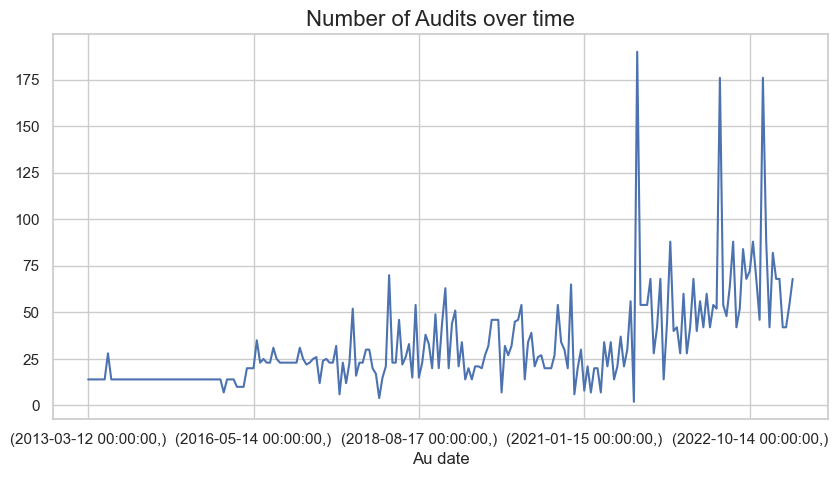

In [16]:
dates = df[date_column].value_counts().sort_index()
dates.plot(figsize = (10,5))
plt.title("Number of Audits over time", fontsize = 16)
plt.show()

## Heatmap of numerical data

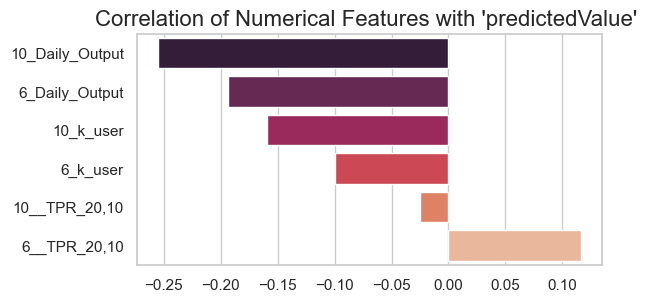

In [17]:
corr_data = df[numerical_columns[:-1]].corrwith(df["predictedValue"]).sort_values()

fig, ax = plt.subplots(figsize = (6,3))
sns.barplot(y = corr_data.index,  x = corr_data.values, orient='h', palette='rocket', ax = ax)

plt.title("Correlation of Numerical Features with 'predictedValue' ", fontsize = 16)

# ax.set_ylabel(" ",labelpad=30)


plt.savefig("Figures/Correlation of each of the numerical features.png", bbox_inches='tight')
plt.show()

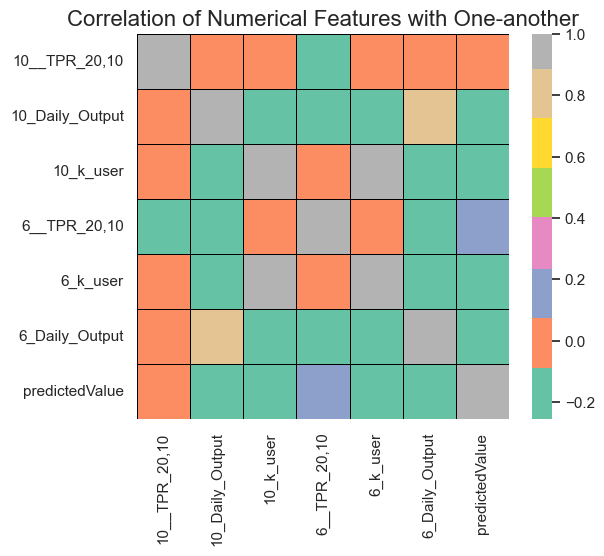

In [18]:
fig, ax = plt.subplots(figsize=(6,5))         # Sample figsize in inches

sns.heatmap(df[numerical_columns].corr(),linewidths=0.5, linecolor='black', ax=ax, center = 0.4, cmap = ("Set2"))
plt.title("Correlation of Numerical Features with One-another", size = 16)

plt.savefig("Figures/Correlation Numerical Features with one another.png",bbox_inches='tight')
plt.show()

In [19]:
per_case_manuf_values = df[["Manuf","predictedValue","Case:"]].groupby(["Case:","Manuf"]).median()

Case 02


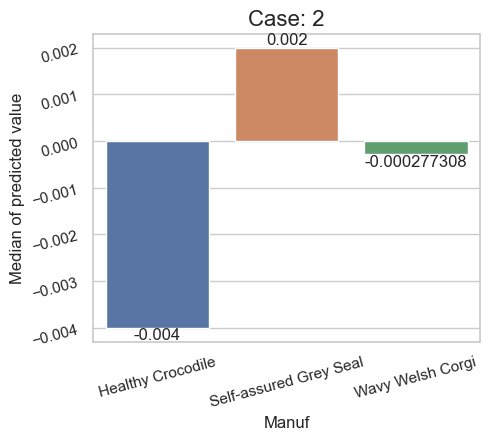

Case 03


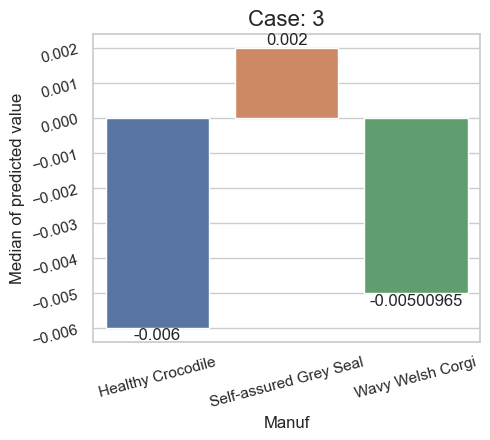

Case 04


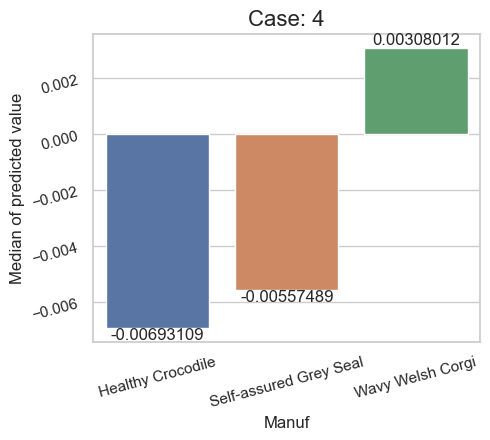

Case 05


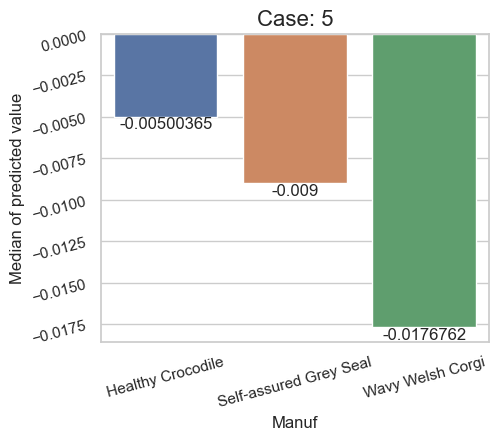

Case 06


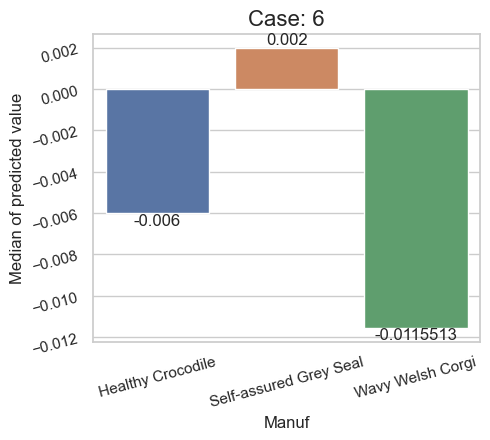

Case 07


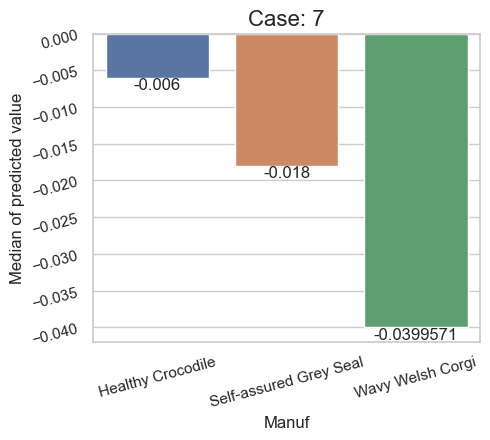

Case 08


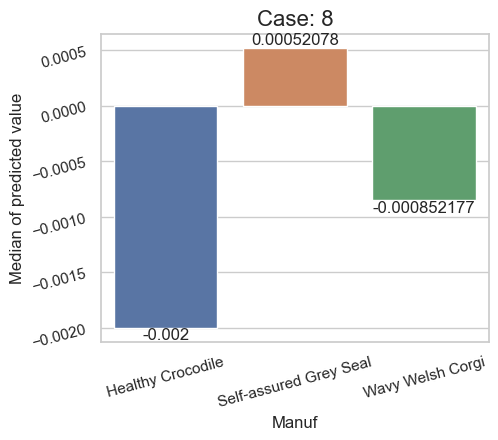

Case 09


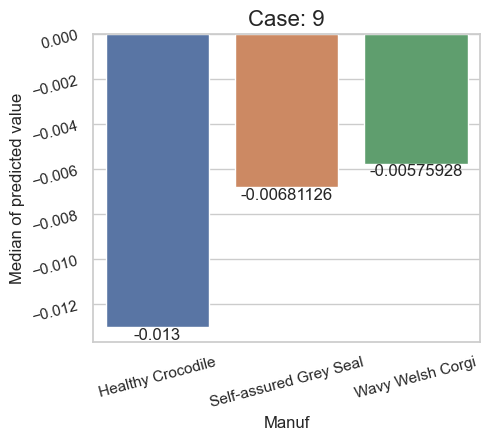

Case 10


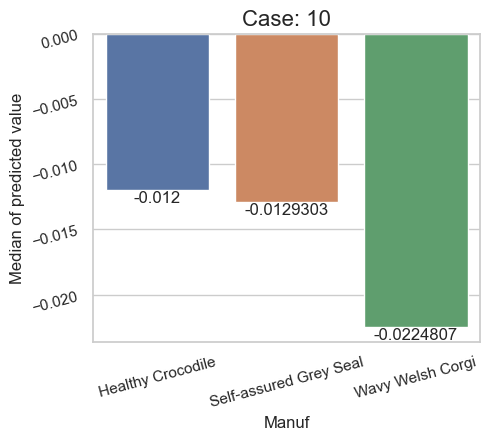

Case 11


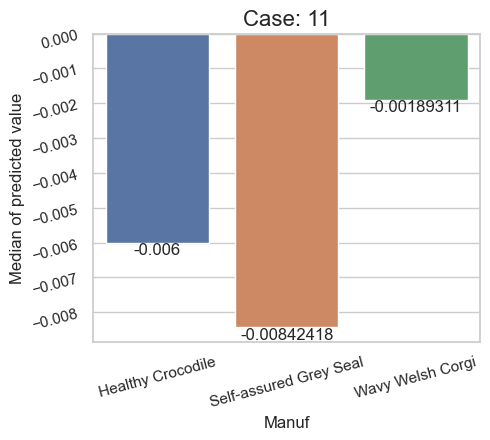

Case 12


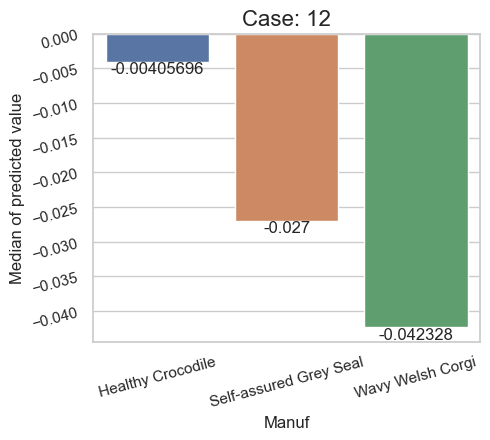

In [21]:
dfs = []
for case, new_df in per_case_manuf_values.groupby(level=0):
    dfs.append(new_df)

sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid")

for index, data in enumerate(dfs):
    case = data.reset_index()["Case:"][0]
    
    clean_df = data.reset_index().drop(columns = 'Case:')
    manuf = clean_df["Manuf"].values
    
    plot = sns.barplot(data = clean_df, x = "Manuf", y = "predictedValue")
    plt.title(f"Case: {case}")
    plot.tick_params(labelrotation=15)
    plot.set_title(f"Case: {case}", size = 16)
    
    plot.bar_label(plot.containers[0])
    
    plot.set_ylabel("Median of predicted value")
    
    if len(str(case)) == 1:
        case = "0" + str(case)
    
    file_name = "Case " + str(case)
    print(file_name)
    plt.savefig("Figures/Manuf by Case/" + file_name, bbox_inches='tight')
    plt.show()

In [ ]:
# dfs = []
# for case, new_df in per_case_manuf_values.groupby(level=0):
#     dfs.append(new_df)
    
# fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (20,20))

# for index, data in enumerate(dfs):
#     case = data.reset_index()["Case:"][0]
    
#     clean_df = data.reset_index().drop(columns = 'Case:')
#     manuf = clean_df["Manuf"].values
    
#     col = index%4
#     row = index//4
    
#     plot = sns.barplot(data = clean_df, x = "Manuf", y = "predictedValue", ax = ax[row, col])
#     plt.title(f"Case: {case}")
#     ax[row,col].tick_params(labelrotation=15)
#     ax[row,col].set_title(f"Case: {case}", size = 16)
    
#     ax[row,col].bar_label(plot.containers[0])
    
#     ax[row,col].set_ylabel("Median of predicted value")

# fig.suptitle("Comparing Manufactureres by Case", size = 20)
# fig.tight_layout(pad=2)

# plt.savefig("Figures/Comparing_Manufacturers_by_Case.png")
# plt.show()

In [22]:
df

,predicted_id,New_Audit_id,Audit_ID,Facility_ID,Status,Auditor1,Auditor2,Auditor3,Au date,Manuf,...,Rev.,Metric:,Case:,Depth:,Energy:,Energy_FFF :,Gantry:,Mode:,Unidentified_column :,predictedValue
0,289713_1_PxVar|2|10|6|0|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,2,10,6.0,0.0,0,1,NaN,-0.011864
1,289713_1_PxVar|3|10|6|0|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,-0.008924
2,289713_1_PxVar|4|15|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,4,15,NaN,NaN,0,1,NaN,-0.013807
3,289713_1_PxVar|4|8|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,4,8,NaN,NaN,0,1,NaN,-0.011913
4,289713_1_PxVar|5|15|NA|NA|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,5,15,NaN,NaN,0,1,NaN,-0.013800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43268,368829_2_PxVar|9|8|10|1|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,9,8,10.0,1.0,0,1,NaN,-0.001000
43269,368829_2_PxVar|10|15|6|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,15,6.0,0.0,0,1,NaN,-0.004000
43270,368829_2_PxVar|10|8|6|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,8,6.0,0.0,0,1,NaN,0.003000
43271,368829_2_PxVar|10|15|10|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,10,15,10.0,0.0,0,1,NaN,0.005000


In [26]:
df[df["Case:"] == 3]["Case:","Manuf","predictedValue"]#.groupby(["Case:","Manuf"]).mean()

KeyError: ('Case:', 'Manuf', 'predictedValue')

,predicted_id,New_Audit_id,Audit_ID,Facility_ID,Status,Auditor1,Auditor2,Auditor3,Au date,Manuf,...,Rev.,Metric:,Case:,Depth:,Energy:,Energy_FFF :,Gantry:,Mode:,Unidentified_column :,predictedValue
1,289713_1_PxVar|3|10|6|0|0|1|NA,289713_1,289713,Whispered Okapi,NaN,NaN,NaN,NaN,2013-03-22,Healthy Crocodile,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,-0.008924
29,174900_1_PxVar|3|10|6|0|0|1|NA,174900_1,174900,Ethical Bumble Bee,NaN,NaN,NaN,NaN,2013-03-24,Healthy Crocodile,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,0.000248
57,412701_1_PxVar|3|10|6|0|0|1|NA,412701_1,412701,Sour Radiated Tortoise,NaN,NaN,NaN,NaN,2013-03-12,Self-assured Grey Seal,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,0.007988
85,134312_1_PxVar|3|10|6|0|0|1|NA,134312_1,134312,Grotesque German Pinscher,NaN,NaN,NaN,NaN,2013-04-03,Healthy Crocodile,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,-0.012346
113,864684_1_PxVar|3|10|6|0|0|1|NA,864684_1,864684,Overjoyed Border Terrier,NaN,NaN,NaN,NaN,2013-03-17,Self-assured Grey Seal,...,1.0,PxVar,3,10,6.0,0.0,0,1,NaN,-0.003488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43246,368829_2_PxVar|3|10|10|1|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,3,10,10.0,1.0,0,1,NaN,0.004000
43247,368829_2_PxVar|3|20|6|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,3,20,6.0,0.0,0,1,NaN,-0.005000
43248,368829_2_PxVar|3|20|10|0|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,3,20,10.0,0.0,0,1,NaN,0.002000
43249,368829_2_PxVar|3|20|6|1|0|1|NA,368829_2,368829,Klutzy English Cocker Spaniel,NaN,Big Lemming,Oval Penguin,NaN,2023-02-14,Healthy Crocodile,...,1.0,PxVar,3,20,6.0,1.0,0,1,NaN,-0.019000
